In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

# DATA PREPROCESSING

In [17]:
# READ DATASET
df = pd.read_csv('./dataset/kendaraan_train.csv')
df.sample(8)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
150038,150039,Wanita,NaN,1.0,36.0,0.0,< 1 Tahun,Tidak,33769.0,152.0,262.0,0
107818,107819,Pria,NaN,1.0,NaN,0.0,1-2 Tahun,Pernah,2630.0,26.0,277.0,0
269753,269754,Pria,53.0,NaN,28.0,0.0,> 2 Tahun,Pernah,38572.0,122.0,197.0,1
230134,230135,Wanita,69.0,1.0,28.0,0.0,NaN,Pernah,32400.0,26.0,189.0,1
226861,226862,NaN,NaN,1.0,28.0,0.0,1-2 Tahun,Pernah,24535.0,124.0,265.0,0
224476,224477,Pria,75.0,1.0,3.0,1.0,1-2 Tahun,Tidak,28915.0,124.0,NaN,0
192405,192406,Pria,67.0,1.0,37.0,1.0,1-2 Tahun,Pernah,29706.0,124.0,227.0,0
263005,263006,Pria,NaN,1.0,28.0,0.0,1-2 Tahun,Tidak,82017.0,122.0,227.0,0


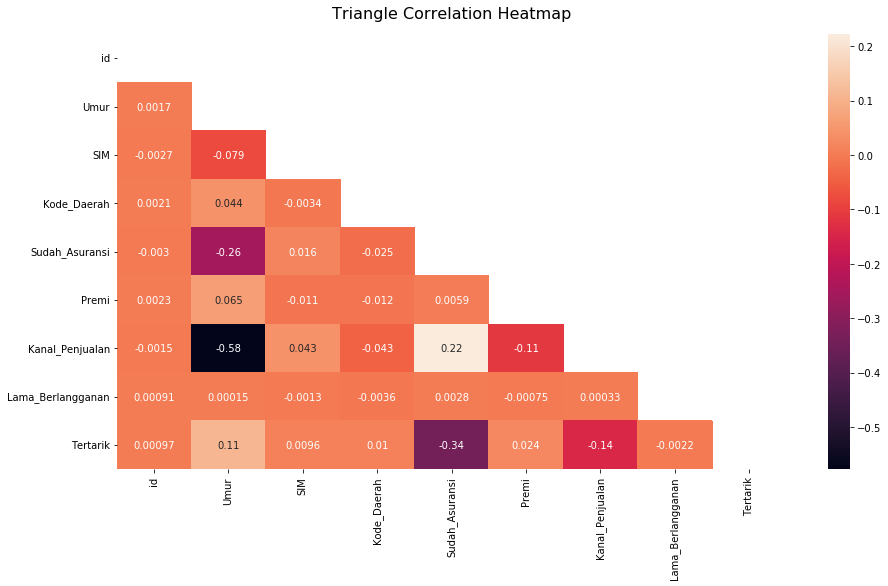

In [3]:
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

## Drop kolom yang tidak digunakan

In [4]:
# DROP id and TERTARIK COLUMN
del df['id']
del df['Tertarik']

## Drop data duplikat

In [5]:
# DROP DUPLIKAT DATA
print("Total Data Sebelum: ", len(df))
print("Total Duplicate Data: ", list(df.duplicated()).count(True))
df.drop_duplicates(inplace=True)
print("Total Data Setelah: ", len(df))
df.sample(8)

Total Data Sebelum:  285831
Total Duplicate Data:  198
Total Data Setelah:  285633


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
279426,Pria,63.0,1.0,28.0,0.0,1-2 Tahun,Pernah,57904.0,124.0,269.0
111033,Pria,36.0,1.0,28.0,0.0,1-2 Tahun,Pernah,66060.0,125.0,71.0
126665,Wanita,37.0,1.0,41.0,1.0,1-2 Tahun,Tidak,27726.0,152.0,26.0
19654,Pria,27.0,1.0,28.0,1.0,< 1 Tahun,NaN,50102.0,152.0,122.0
51789,Wanita,64.0,1.0,20.0,0.0,1-2 Tahun,Pernah,2630.0,124.0,30.0
185409,Wanita,36.0,1.0,28.0,0.0,1-2 Tahun,Pernah,2630.0,NaN,158.0
29355,Wanita,24.0,1.0,8.0,1.0,< 1 Tahun,Tidak,28773.0,152.0,234.0
230161,Wanita,65.0,1.0,32.0,1.0,1-2 Tahun,Tidak,33542.0,26.0,95.0


## Melihat Jenis Data

In [6]:
# Menampilkan tipe data dari setiap kolom
df.dtypes

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
dtype: object

## Mengelompokkan data

In [7]:
# Membuat variabel konstant untuk menyimpan daftar kolom sesuai kategori
NUMERICAL_COLS = ['Umur','Kode_Daerah','Umur_Kendaraan','Premi','Kanal_Penjualan','Lama_Berlangganan']
CATEGORICAL_COLS = ['Jenis_Kelamin','SIM','Umur_Kendaraan','Sudah_Asuransi','Kendaraan_Rusak']

## Mengubah data categorical menjadi numerik

In [8]:
# Melakukan perubahan data terhadap beberapa data kategori
x = {'Pernah': 1, "Tidak": 0}
df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].map(x)
x = {'Pria': 1, "Wanita": 0}
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].map(x)
x = {'< 1 Tahun': 1, '1-2 Tahun': 2, '> 2 Tahun': 3}
df['Umur_Kendaraan'] = df['Umur_Kendaraan'].map(x)

## Menampilkan histogram

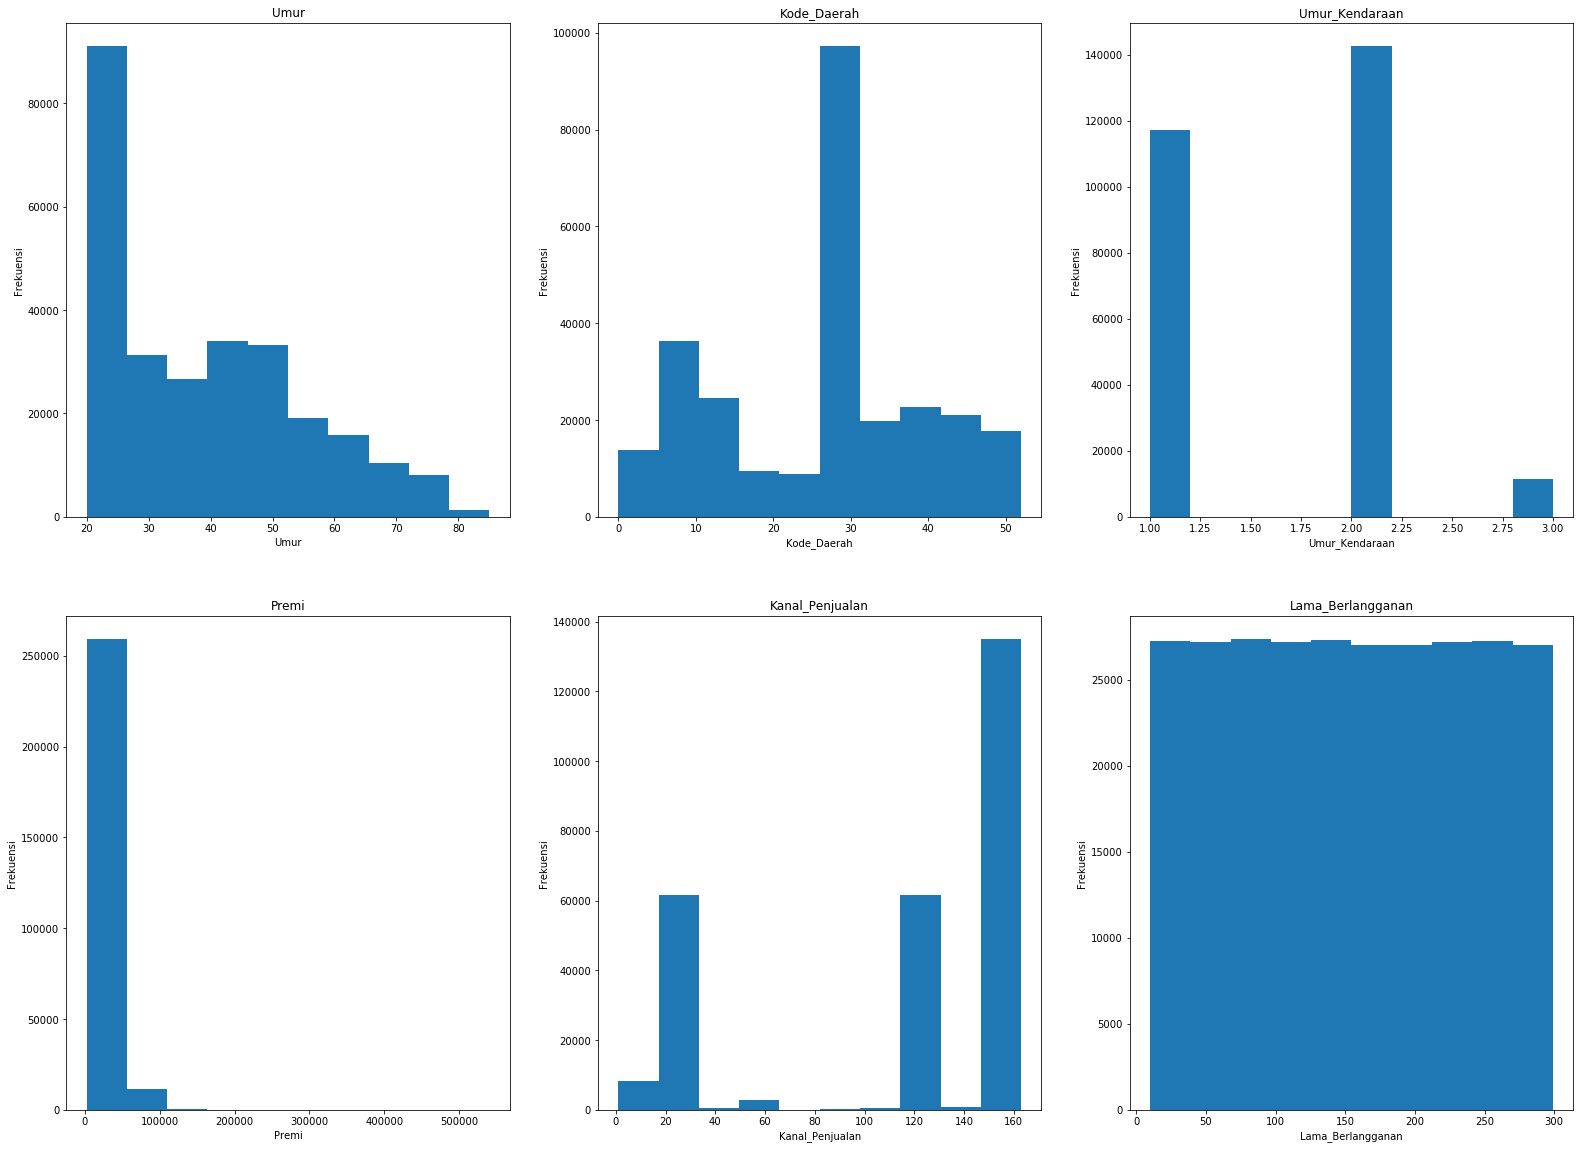

In [9]:
# Membuat plot histogram untuk kolom numerik
plt.figure(figsize=(27,20))
for idx, i in enumerate(NUMERICAL_COLS):
    plt.subplot(2,3,idx+1)
    plt.hist(df[i])
    plt.title(f'{i}') 
    plt.xlabel(f'{i}') 
    plt.ylabel('Frekuensi')
plt.show()

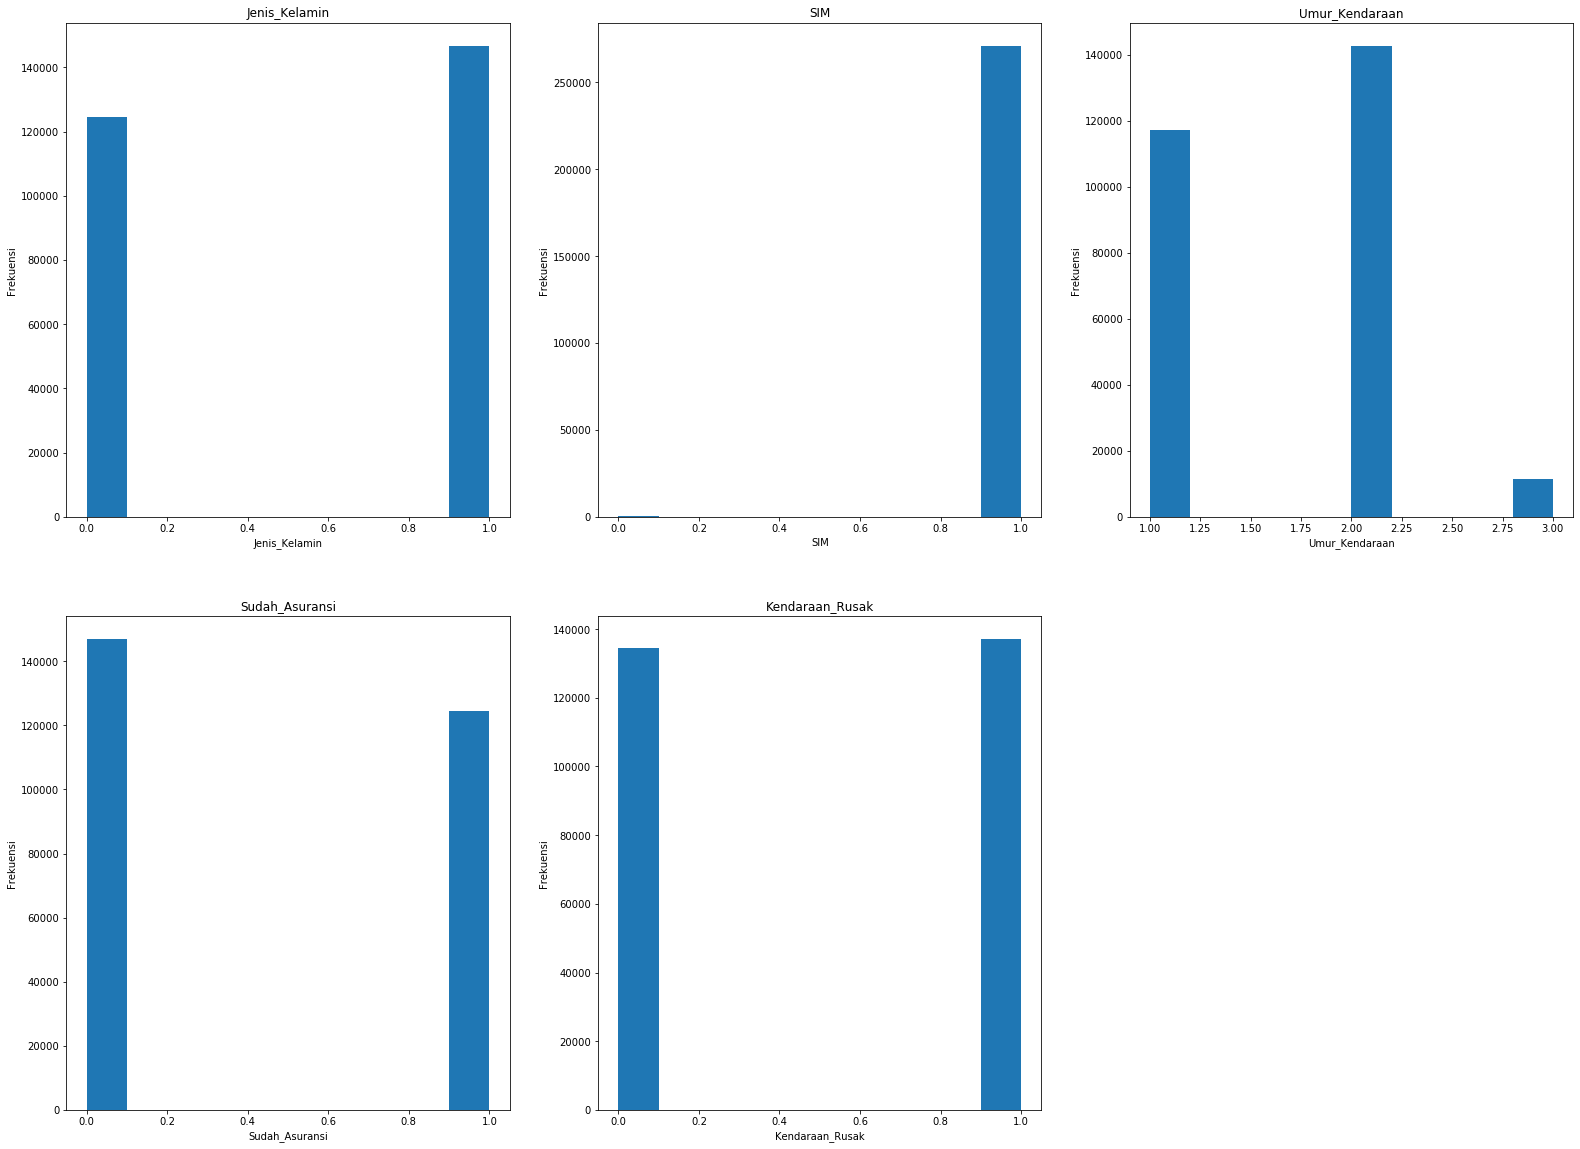

In [10]:
# Membuat plot histogram untuk kolom kategori
plt.figure(figsize=(27,20))
for idx, i in enumerate(CATEGORICAL_COLS):
    plt.subplot(2,3,idx+1)
    plt.hist(df[i])
    plt.title(f'{i}') 
    plt.xlabel(f'{i}') 
    plt.ylabel('Frekuensi')
plt.show()

## Melakukan pengecekan terhadap missing value

In [11]:
df.isnull().sum()

Jenis_Kelamin        14439
Umur                 14197
SIM                  14404
Kode_Daerah          14288
Sudah_Asuransi       14229
Umur_Kendaraan       14274
Kendaraan_Rusak      14187
Premi                14504
Kanal_Penjualan      14296
Lama_Berlangganan    13911
dtype: int64

## Mengelompokkan data berdasarkan metode mengatasi missing valuenya

In [12]:
# Membuat variabel konstant berisi daftar kolom sesuai cara mengatasi missing valuenya
COL_MEAN = ['Kode_Daerah','Lama_Berlangganan','Kanal_Penjualan','Kendaraan_Rusak']
COL_MODE = 'SIM'
COL_MEDIAN = ['Umur','Jenis_Kelamin','Umur_Kendaraan','Premi','Sudah_Asuransi']

In [13]:
df[COL_MEAN]=df[COL_MEAN].fillna(df.mean())
df[COL_MODE].fillna(df[COL_MODE].mode()[0], inplace=True)
for i in COL_MEDIAN:
    df[i].fillna(df[i].median(), inplace=True)
df.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

## Menampilkan boxplot

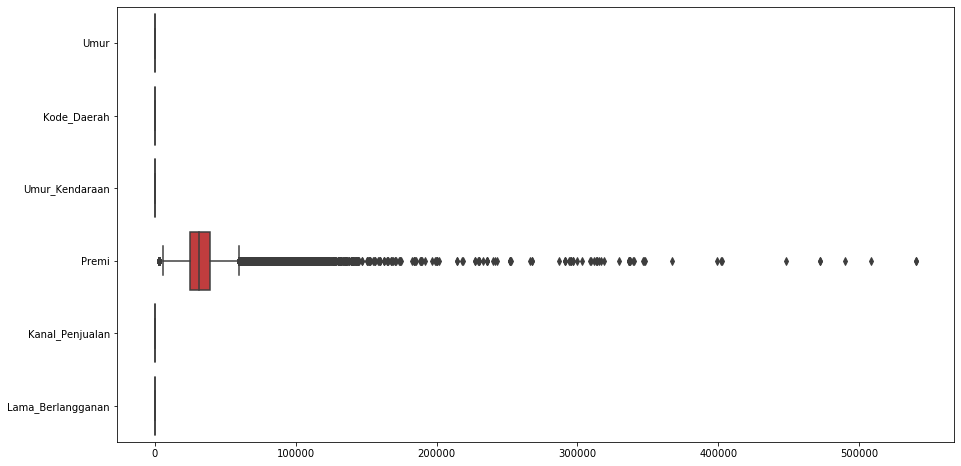

In [14]:
# Menampilkan boxplot untuk data numerik
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[NUMERICAL_COLS], orient='h')
plt.show()

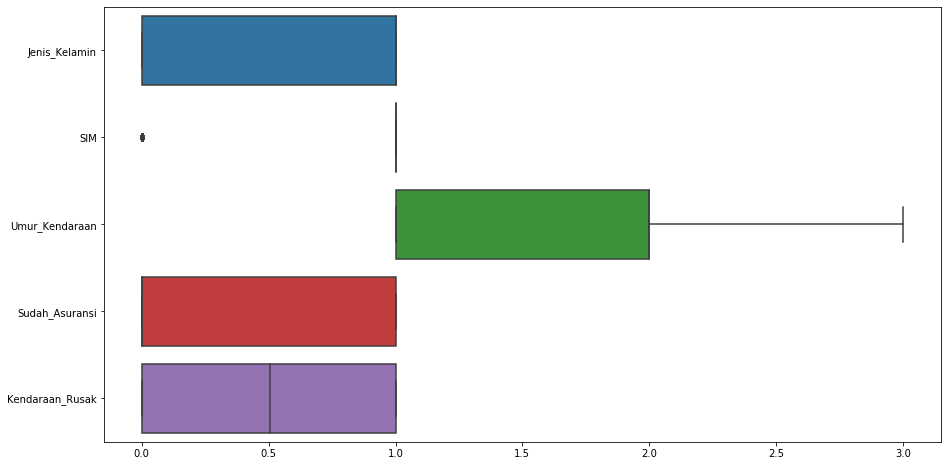

In [15]:
# Menampilkan boxplot untuk data kategori
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[CATEGORICAL_COLS], orient='h')
plt.show()

## Melakukan drop kolom premi

In [16]:
# Drop kolom premi karena terlalu banyak pencilan
del df['Premi']

## Melakukan data transformasi

In [17]:
# standart scalar
df=(df-df.mean())/df.std()

## Menampilkan heatmap

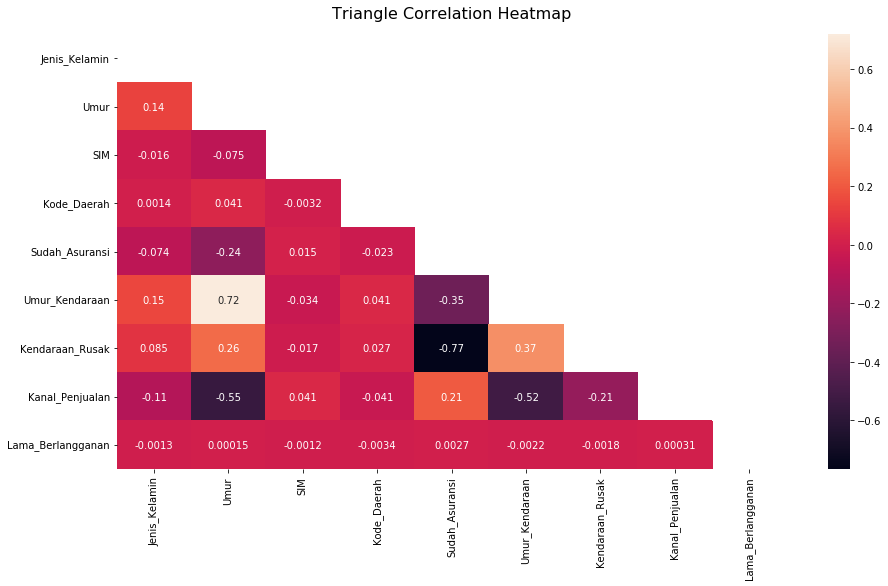

In [18]:
# membuat plot heatmap
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

## Melakukan drop terhadap kolom kategori

In [19]:
# melakukan drop kolom kategori
# akan dijelaskan pada bagian explorasi
df_numerik = df.drop(axis=1, columns=CATEGORICAL_COLS)
df_numerik.sample(7)

,Umur,Kode_Daerah,Kanal_Penjualan,Lama_Berlangganan
275595,1.075875,0.123421,-1.136081,0.658060
164293,-0.046539,-1.812070,0.908230,0.229303
36961,-0.706782,0.123421,0.756800,-0.052452
256839,-0.574734,-1.812070,0.851444,1.050067
63690,-1.036904,0.200841,0.832515,0.000000
36072,-0.706782,0.123421,0.756800,0.008799
102587,1.405997,0.123421,0.870372,1.184819


## Menampilkan heatmap data numerik

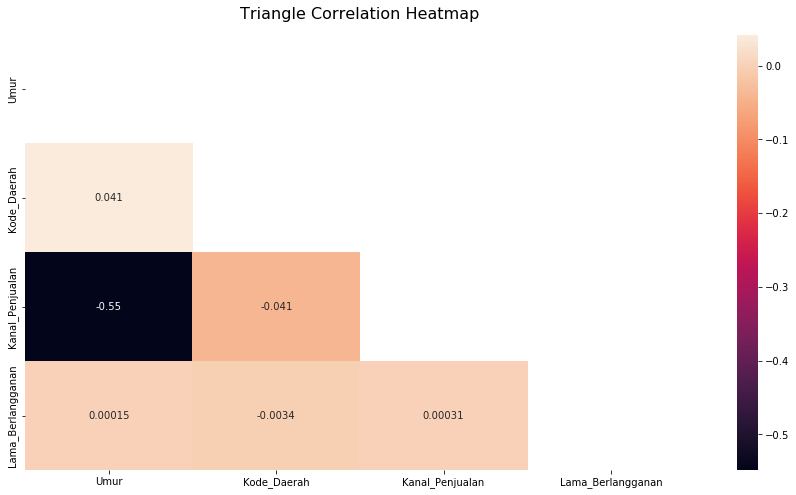

In [20]:
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df_numerik.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_numerik.corr(), mask=mask, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

## Menyimpan hasil dataframe

In [21]:
df_numerik.to_csv('./dataset/kendaraan_train_clean.csv', encoding='utf-8', index=False)
df.to_csv('./dataset/kendaraan_train_clean_full.csv', encoding='utf-8', index=False)